# Week3　授業前課題1　アヤメの分析
「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。

これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

- Iris setosa
- Iris virgicolor
- Iris virginica

setosa、virgiclor、virginicaはここで **目的変数** や **ラベル** と呼ばれるものに当たります。

1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を **特徴量** と呼びます。

### 【問題1】データの取得  
irisデータセット読み込みましょう。

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数``X``に格納してください。列の名前も以下を参考にしてください。

In [2]:
from sklearn import datasets
import pandas as pd

X, y = datasets.load_iris(return_X_y=True)
X = pd.DataFrame(data=X)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = pd.DataFrame(data=y)
y.columns = ['Species']

print("X = \n%s" % X)
print("y = \n%s" % y)

X = 
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
y = 
     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


### 【問題2】データの結合  
問題1で準備した``X,y``を結合させたDataFrame型変数``df``を作成してください。結合することで扱いやすくなります。これ以降はこの``df``を使っていきます。

In [3]:
df = pd.concat([X, y], axis=1)

print("df = \n%s" % df)

df = 
     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


### 【問題3】データの確認  
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである``.head()``,``.info()``,``.describe()``,``.isnull()``,``.sum()``や、Seriesのメソッドである``.value_counts``などを使ってみましょう。

In [4]:
# 先頭から4番目のサンプルまで表示
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# 各特徴量の情報
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
# ラベルごとのサンプル数の合計を出力(.sum())
n_sample_0 = sum(df['Species'] == 0)
n_sample_1 = sum(df['Species'] == 1)
n_sample_2 = sum(df['Species'] == 2)

print("number of Spiecies:0 = %s" % n_sample_0)
print("number of Spiecies:1 = %s" % n_sample_1)
print("number of Spiecies:2 = %s" % n_sample_2)

# ラベルごとのサンプル数の合計を出力(.value_counts())
df['Species'].value_counts()

number of Spiecies:0 = 50
number of Spiecies:1 = 50
number of Spiecies:2 = 50


2    50
1    50
0    50
Name: Species, dtype: int64

In [7]:
# 各特徴量に欠損値があるか確認
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [8]:
# 各特徴量の平均、標準偏差、四分位数を表示
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 【問題4】irisデータセット自体の調査  
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

- パターン認識の文献で最もよく知られるデータベース
- 英国の統計学者R.A. Fisherが“The use of multiple measurements in taxonomic problems”(1936)で、一例として使用したのが始まり
- データはアメリカの植物学者Edger Andersonが収集したため、Andersonのirisデータセットと呼ばれることもある
- 3種のirisのうち2種は、ガスペ島にある同一の牧草地から、同じ日に同じ装置で同じ人が同時に測定したもの

>https://en.wikipedia.org/wiki/Iris_flower_data_set

### 【問題5】必要なデータを抽出  
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

- ``sepal_width``の列を３つの異なる方法で抽出する
- ``50番目から99番目まで``のデータを抽出する
- ``petal_length``の列の``50番目から99番目``までのデータを抽出する
- ``petal_width``の値が0.2のデータを抽出する

``.loc``や``.iloc``を使うことになります。この２つはどう違うのかについて説明してください。

In [9]:
# sepal_widthの列を3つの方法で取得
print("sepal_width = \n%s\n\n" % df['sepal_width'])
print("sepal_width = \n%s\n\n" % df.loc[:, 'sepal_width'])
print("sepal_width = \n%s" % df.iloc[:, 1])

sepal_width = 
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


sepal_width = 
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


sepal_width = 
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


In [174]:
# 50番目から99番目までのデータを取得
print("sample(50～99) = \n%s" % df.iloc[50:100, :])

sample(50～99) = 
    sepal_length  sepal_width  petal_length  petal_width  Species
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          2.8           4.6          1.5        1
55           5.7          2.8           4.5          1.3        1
56           6.3          3.3           4.7          1.6        1
57           4.9          2.4           3.3          1.0        1
58           6.6          2.9           4.6          1.3        1
59           5.2          2.7           3.9          1.4        1
60           5.0          2.0           3.5          1.0        1
61           5.9          3.0           4.2          1.5        1
62           6.0          2.2           4.0          1.0        1
63           6.1          2.9           4.7          1.4   

In [175]:
# petal_lengthの列の50番目から99番目までのデータを取得
print("petal_length(50～99) = \n%s" % df.loc[50:100, 'petal_length'])

petal_length(50～99) = 
50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
56     4.7
57     3.3
58     4.6
59     3.9
60     3.5
61     4.2
62     4.0
63     4.7
64     3.6
65     4.4
66     4.5
67     4.1
68     4.5
69     3.9
70     4.8
71     4.0
72     4.9
73     4.7
74     4.3
75     4.4
76     4.8
77     5.0
78     4.5
79     3.5
80     3.8
81     3.7
82     3.9
83     5.1
84     4.5
85     4.5
86     4.7
87     4.4
88     4.1
89     4.0
90     4.4
91     4.6
92     4.0
93     3.3
94     4.2
95     4.2
96     4.2
97     4.3
98     3.0
99     4.1
100    6.0
Name: petal_length, dtype: float64


In [176]:
# petal_widthの値が0.2のデータを抽出する
print("petal_width:0.2 = \n%s" % df[df['petal_width'] == 0.2])

petal_width:0.2 = 
    sepal_length  sepal_width  petal_length  petal_width  Species
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
7            5.0          3.4           1.5          0.2        0
8            4.4          2.9           1.4          0.2        0
10           5.4          3.7           1.5          0.2        0
11           4.8          3.4           1.6          0.2        0
14           5.8          4.0           1.2          0.2        0
20           5.4          3.4           1.7          0.2        0
22           4.6          3.6           1.0          0.2        0
24           4.8          3.4           1.9          0.2        0
25           5.0          3.0           1.6          0.2 

#### ＜``.loc()``と``.iloc()``の違い＞
``.loc()``は行・列のラベルで指定し、``.iloc()``は行・列の番号で指定する

### 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

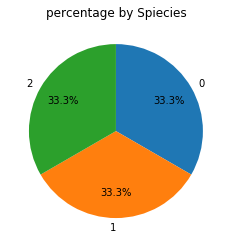

In [177]:
# ラベルごとに円グラフを表示
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

label = ['0', '1', '2']
plt.title("percentage by Spiecies")
plt.pie(df['Species'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
plt.show()

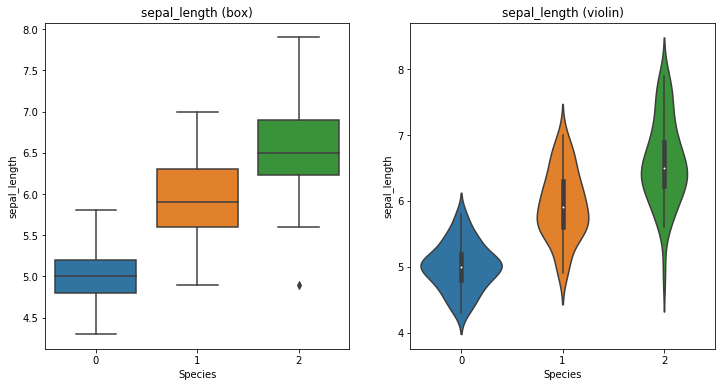

In [178]:
# sepal_lengthの箱ひげ図・バイオリン図
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.boxplot(x="Species", y="sepal_length", data=df, ax=ax[0])
ax[0].set_title("sepal_length (box)")
sns.violinplot(x="Species", y="sepal_length", data=df, ax=ax[1])
ax[1].set_title("sepal_length (violin)")
plt.show()

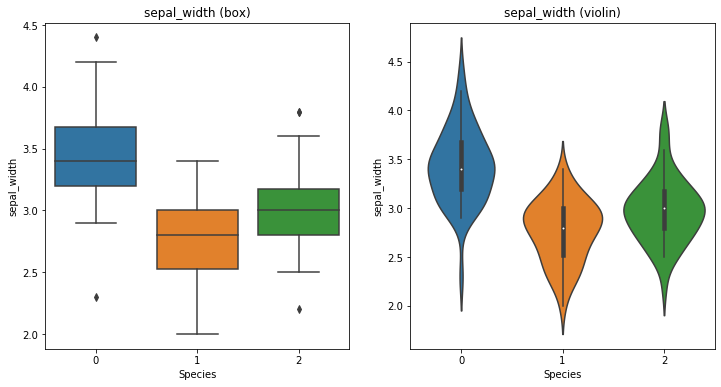

In [179]:
# sepal_widthの箱ひげ図・バイオリン図
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.boxplot(x="Species", y="sepal_width", data=df, ax=ax[0])
ax[0].set_title("sepal_width (box)")
sns.violinplot(x="Species", y="sepal_width", data=df, ax=ax[1])
ax[1].set_title("sepal_width (violin)")
plt.show()

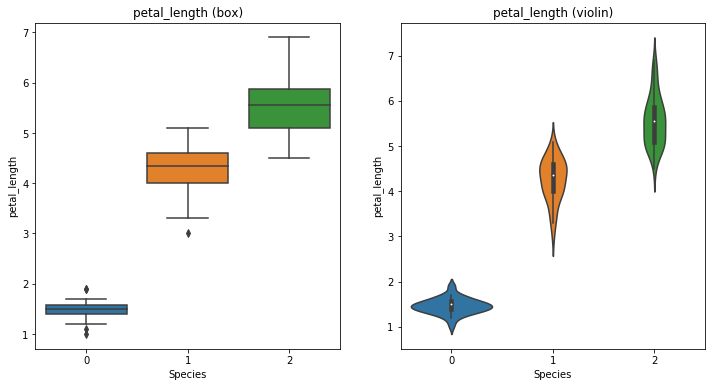

In [180]:
# petal_lengthの箱ひげ図・バイオリン図
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.boxplot(x="Species", y="petal_length", data=df, ax=ax[0])
ax[0].set_title("petal_length (box)")
sns.violinplot(x="Species", y="petal_length", data=df, ax=ax[1])
ax[1].set_title("petal_length (violin)")
plt.show()

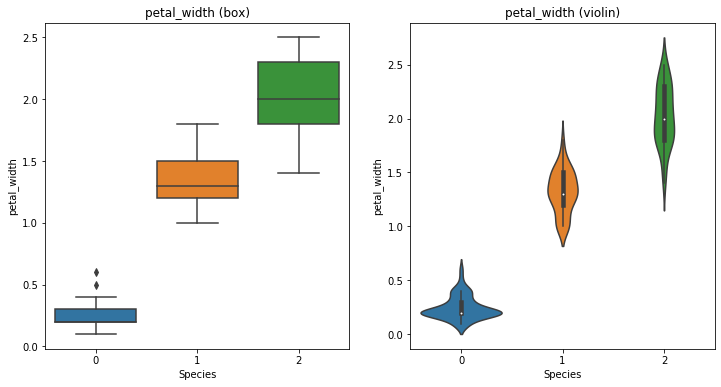

In [181]:
# petal_widthの箱ひげ図・バイオリン図
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.boxplot(x="Species", y="petal_width", data=df, ax=ax[0])
ax[0].set_title("petal_width (box)")
sns.violinplot(x="Species", y="petal_width", data=df, ax=ax[1])
ax[1].set_title("petal_width (violin)")
plt.show()

#### ＜箱ひげ図とバイオリン図の違い＞  
- 箱ひげ図は四分位数が一目でわかり、外れ値も見つけやすい。一方で、分布の様子を知ることはできない。
- バイオリン図は値の分布の様子を知ることができるが、四分位数や外れ値が見づらい。

### 【問題7】特徴量間の関係の確認  
特徴量間の関係を見ていきます。次の4つを行ってください。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

相関係数行列はDataFrameの``corr()``メソッドを使うことで求められます。

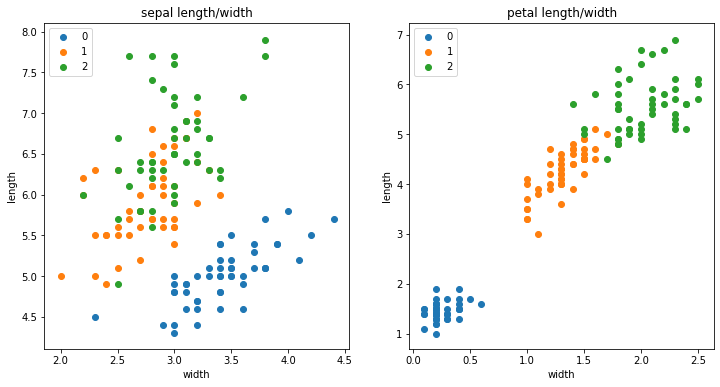

In [182]:
# 散布図
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sample_0 = df[df['Species'] == 0]
sample_1 = df[df['Species'] == 1]
sample_2 = df[df['Species'] == 2]

ax[0].scatter(sample_0.loc[:,'sepal_width'], 
              sample_0.loc[:,'sepal_length'], label='0')
ax[0].scatter(sample_1.loc[:,'sepal_width'], 
              sample_1.loc[:,'sepal_length'], label='1')
ax[0].scatter(sample_2.loc[:,'sepal_width'], 
              sample_2.loc[:,'sepal_length'], label='2')
ax[0].legend(loc='upper left')
ax[0].set_title('sepal length/width')
ax[0].set_xlabel('width')
ax[0].set_ylabel('length')

ax[1].scatter(sample_0.loc[:,'petal_width'], 
              sample_0.loc[:,'petal_length'], label='0')
ax[1].scatter(sample_1.loc[:,'petal_width'], 
              sample_1.loc[:,'petal_length'], label='1')
ax[1].scatter(sample_2.loc[:,'petal_width'], 
              sample_2.loc[:,'petal_length'], label='2')
ax[1].legend(loc='upper left')
ax[1].set_title('petal length/width')
ax[1].set_xlabel('width')
ax[1].set_ylabel('length')

plt.show()

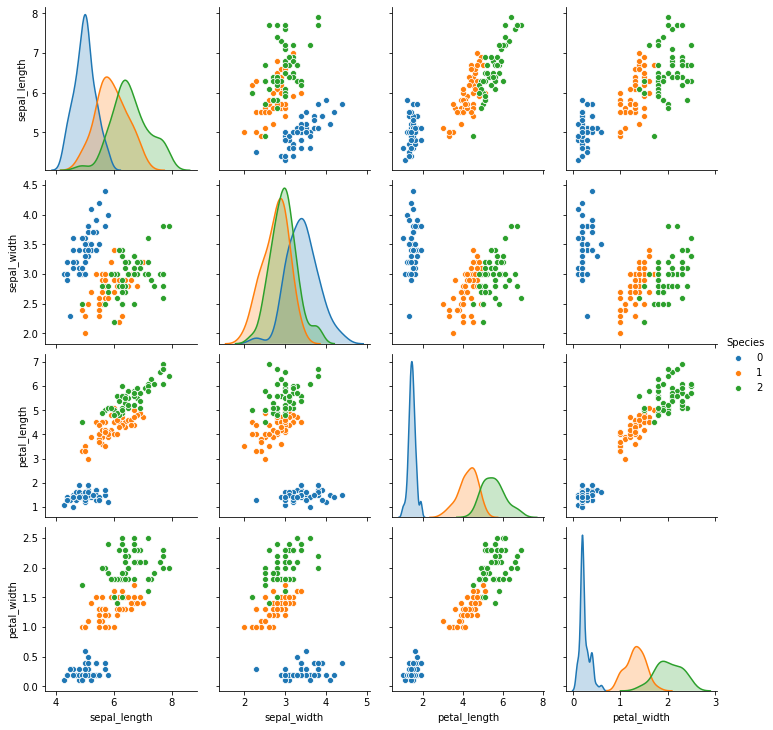

In [183]:
# 散布図行列
sns.pairplot(df, hue='Species')
plt.show()

In [11]:
# 相関係数行列（Pearsonの積率相関係数）
cor_matrix = df.iloc[:, :-1].corr(method='pearson')
print("correlation_matrix : \n%s" % cor_matrix)

correlation_matrix : 
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


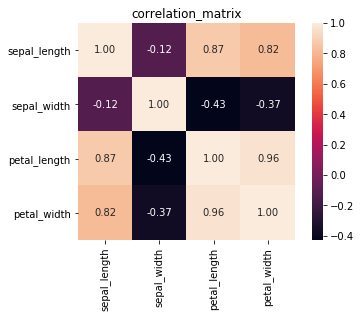

In [185]:
# 相関係数行列のヒートマップ
sns.heatmap(cor_matrix, cbar=True, annot=True,
           square=True, fmt='.2f') 
plt.title("correlation_matrix")
plt.show()

### 【問題8】可視化したグラフや表の結果の説明  
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

#### ＜考察＞  
散布図行列や相関係数行列をみると、petal_lengthやpetal_widthは品種間での分布が異なっており、分類にあたって有益な情報ではないかと思われる。とくに品種0は狭い範囲に集中して分布し、他の2種からよく判別できそうだと思われる。
一方で、sepal_lengthやsepal_widthは品種間での分布にあまり差がないように見え、lengthとwidthとの相関係数も小さい。このことから、これらの特徴量は品種に関わらず個体間でのバラつきが大きく、分類にはあまり有用ではない特徴量のように思える。